## Read sentinel-2 satellite image

In [3]:
file_dir = '/Users/wentingjiang/Downloads/S2A_MSIL2A_20200210T091121_N0214_R050_T35SKC_20200210T104450.SAFE/GRANULE/L2A_T35SKC_A024214_20200210T091322/IMG_DATA/R10m'

In [4]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
tci = rasterio.open(file_dir +'/T35SKC_20200210T091121_TCI_10m.jp2', driver='JP2OpenJPEG').read(1)

In [6]:
image = rasterio.open(file_dir +'/T35SKC_20200210T091121_TCI_10m.jp2', driver='JP2OpenJPEG')

In [7]:
xres = (image.bounds.right - image.bounds.left) / image.width
yres = (image.bounds.top - image.bounds.bottom) / image.height

print(xres, yres)
print("Are the pixels square: {}".format(xres == yres))

10.0 10.0
Are the pixels square: True


In [13]:
image.bounds.right

309780.0

In [9]:
image.bounds.left

199980.0

In [14]:
image.bounds.top

4300020.0

In [15]:
image.bounds.bottom

4190220.0

In [23]:
tci.shape

(10980, 10980)

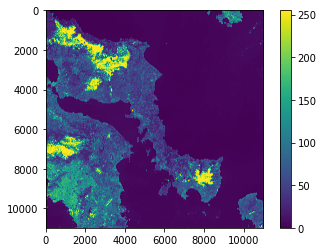

In [10]:
fig = plt.imshow(tci)
plt.colorbar()

# Display the results.
plt.show()

In [30]:
tci.shape

(10980, 10980)

In [38]:
small = tci[9150:10980, 0:1830]

In [39]:
# this will be the final shape of our area of interest: (1830, 1830) small.shape

(1830, 1830)

In [41]:
10980/1830

6.0

In [66]:
top_left = (38.79789465, 23.54549704)
bottom_left = (38.79789465, 24.83824)
bottom_right = (37.839596, 24.83824)

In [75]:
AOI_top_left = (bottom_left[0], bottom_left[1] + (top_left[1] - bottom_left[1])/6)
AOI_bottom_left = bottom_left
#AOI_top_right = (AOI_bottom_right[0],AOI_top_left[1])
AOI_bottom_right = (bottom_left[0] + (bottom_right[0] - bottom_left[0])/6, bottom_left[1])
AOI_top_right = (AOI_bottom_right[0],AOI_top_left[1])

In [76]:
print(AOI_top_left, AOI_bottom_left, AOI_bottom_right, AOI_top_right)

(38.79789465, 24.62278284) (38.79789465, 24.83824) (38.638178208333336, 24.83824) (38.638178208333336, 24.62278284)


In [77]:
coordinates_list = str({'AOI_top_left': AOI_top_left, 
                       'AOI_bottom_left': AOI_bottom_left,
                       'AOI_bottom_right': AOI_bottom_right,
                       'AOI_top_right': AOI_top_right})

In [78]:
with open("coordinates_AOI_check.txt","a") as f:
      f.write(coordinates_list)

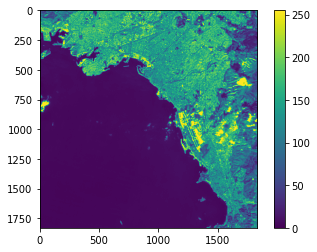

In [40]:
fig = plt.imshow(small)
plt.colorbar()

# Display the results.
plt.show()